In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import morton
import os
from hilbertcurve.hilbertcurve import HilbertCurve

### Constants

In [3]:
OFFSET = 10
FACTOR_MULTIPLY = 10000

### Read file

In [21]:
#df = pd.read_csv('data/lane_changes_updated/lane_change_8.csv', sep=';')
#df = pd.read_csv('data/normal_drive.csv', sep=';')
#df = pd.read_csv('data/lane_changes_updated/lane_change_1.csv', sep=';')
#df = pd.read_csv('data/2022-09-21_LaneChanges/Accel_Separated/20Hz/Vehicle-IMU-Acceleration-31.csv', sep=';')
#df['ts'] = (df['sampleTimeStamp.seconds']*1000000)+df['sampleTimeStamp.microseconds']
#df_Accel = pd.read_csv('data/2022-09-21_LaneChanges/Accel_Separated/10Hz/Vehicle-IMU-Acceleration-24.csv', sep=';')
#df_Accel['ts'] = (df_Accel['sampleTimeStamp.seconds']*1000000)+df_Accel['sampleTimeStamp.microseconds']
#df_Accel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

#df_AngularVel = pd.read_csv('data/2022-09-21_LaneChanges/AngularVelocities_Separated/Vehicle-IMU-AngularVelocities-50Hz-30.csv', sep=';')
#df_AngularVel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

#df = pd.concat([df_Accel, df_AngularVel], axis=1)
#df = pd.read_csv('data/lane_changes/20Hz/lane_change_1.csv', sep=';')
#df = pd.read_csv('data/lane_changes/normal_drive.csv', sep=';')



# LATEST: 
df_Accel = pd.read_csv('data/2022-09-21_LaneChanges/Accel_Separated/10Hz/with_noise/Vehicle-IMU-Acceleration-30.csv', sep=';')
df_Accel['ts'] = (df_Accel['sampleTimeStamp.seconds']*1000000)+df_Accel['sampleTimeStamp.microseconds']
df_Accel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

df_Steering = pd.read_csv('data/2022-09-21_LaneChanges/SteeringWheelAngle_Separated/10Hz/with_noise/SteeringWheelAngle-30.csv', sep=';')
df_Steering.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

df = pd.concat([df_Accel, df_Steering], axis=1)

df


#df = df.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

,sent.seconds,sent.microseconds,received.seconds,received.microseconds,sampleTimeStamp.seconds,sampleTimeStamp.microseconds,IMULatAcceleration,IMULgtAcceleration,IMUVerAcceleration,ts,sent.seconds,sent.microseconds,received.seconds,received.microseconds,sampleTimeStamp.seconds,sampleTimeStamp.microseconds,SteeringWhlAngle
0,1663765134,97499,1663765134,97523,1663765134,97449,-1.9890,-2.5075,9.2650,1663765134097449,1663765134,89933,1663765134,89956,1663765134,89884,-2.791016
1,1663765134,197515,1663765134,197539,1663765134,197466,-2.1590,-2.2100,9.6135,1663765134197466,1663765134,189612,1663765134,189635,1663765134,189557,-3.505859
2,1663765134,298027,1663765134,298051,1663765134,297979,-2.3460,-2.3120,9.9195,1663765134297979,1663765134,289909,1663765134,289946,1663765134,289857,-4.254883
3,1663765134,397517,1663765134,397542,1663765134,397467,-2.4055,-2.3120,9.7665,1663765134397467,1663765134,389931,1663765134,389953,1663765134,389879,-4.986328
4,1663765134,497544,1663765134,497568,1663765134,497495,-2.6520,-2.0570,9.5965,1663765134497495,1663765134,489714,1663765134,489737,1663765134,489657,-5.848633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1663765159,598177,1663765159,598202,1663765159,598128,-2.2950,-0.6120,9.6135,1663765159598128,1663765159,590540,1663765159,590563,1663765159,590491,-6.033203
256,1663765159,698606,1663765159,698630,1663765159,698555,-2.3460,-0.6290,9.5965,1663765159698555,1663765159,690445,1663765159,690468,1663765159,690399,-6.274414
257,1663765159,798644,1663765159,798668,1663765159,798595,-2.3630,-0.6120,9.5710,1663765159798595,1663765159,790554,1663765159,790576,1663765159,790506,-6.421875
258,1663765159,898576,1663765159,898599,1663765159,898527,-2.2100,-0.5695,9.6305,1663765159898527,1663765159,890553,1663765159,890574,1663765159,890508,-6.459961


In [60]:
# Reading other files for CSP analysis of different maneouvres
# Plotting braking_cut shows us that certain parts of the resulting CSP are the same as with the lane change.
#df = pd.read_csv('data/braking_cut.csv', sep=';')
#df = pd.read_csv('data/braking_and_lanechange.csv', sep=';')

### Apply constants

In [6]:
df['IMULgtAcceleration']=df['IMULgtAcceleration'].add(OFFSET)
df['IMULatAcceleration']=df['IMULatAcceleration'].add(OFFSET)
df['SteeringWhlAngle']=df['SteeringWhlAngle'].add(OFFSET)

df['IMULgtAcceleration'] = df.apply(lambda x: int(x['IMULgtAcceleration']*FACTOR_MULTIPLY) , axis=1)
df['IMULatAcceleration'] = df.apply(lambda x: int(x['IMULatAcceleration']*FACTOR_MULTIPLY) , axis=1)
df['SteeringWhlAngle'] = df.apply(lambda x: int(x['SteeringWhlAngle']*FACTOR_MULTIPLY) , axis=1)

### Morton indexing

In [16]:
m = morton.Morton(dimensions=2, bits=18)

def set_value(row):
    return m.pack(int(row['IMULatAcceleration']), int(row['SteeringWhlAngle']))

df['morton'] = df.apply(set_value, axis=1)
df

,sent.seconds,sent.microseconds,received.seconds,received.microseconds,sampleTimeStamp.seconds,sampleTimeStamp.microseconds,IMULatAcceleration,IMULgtAcceleration,IMUVerAcceleration,ts,sent.seconds,sent.microseconds,received.seconds,received.microseconds,sampleTimeStamp.seconds,sampleTimeStamp.microseconds,SteeringWhlAngle,morton
0,1663765134,97499,1663765134,97523,1663765134,97449,80109,74925,9.2650,1663765134097449,1663765134,89933,1663765134,89956,1663765134,89884,72089,13015111379
1,1663765134,197515,1663765134,197539,1663765134,197466,78410,77900,9.6135,1663765134197466,1663765134,189612,1663765134,189635,1663765134,189557,64941,7241898214
2,1663765134,298027,1663765134,298051,1663765134,297979,76540,76880,9.9195,1663765134297979,1663765134,289909,1663765134,289946,1663765134,289857,57451,7185137114
3,1663765134,397517,1663765134,397542,1663765134,397467,75945,76880,9.7665,1663765134397467,1663765134,389931,1663765134,389953,1663765134,389879,50136,7051339457
4,1663765134,497544,1663765134,497568,1663765134,497495,73480,79430,9.5965,1663765134497495,1663765134,489714,1663765134,489737,1663765134,489657,41513,6599542978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1663765159,598177,1663765159,598202,1663765159,598128,77050,93880,9.6135,1663765159598128,1663765159,590540,1663765159,590563,1663765159,590491,39667,6557335374
256,1663765159,698606,1663765159,698630,1663765159,698555,76540,93710,9.5965,1663765159698555,1663765159,690445,1663765159,690468,1663765159,690399,37255,6547756410
257,1663765159,798644,1663765159,798668,1663765159,798595,76370,93880,9.5710,1663765159798595,1663765159,790554,1663765159,790576,1663765159,790506,35781,6523105574
258,1663765159,898576,1663765159,898599,1663765159,898527,77900,94305,9.6305,1663765159898527,1663765159,890553,1663765159,890574,1663765159,890508,35400,6535262416


### Morton Plots

### Scatter Plots

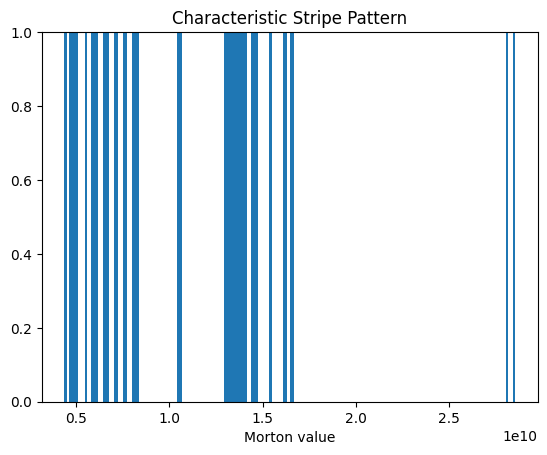

In [17]:
# 'bins' explained: https://www.metabase.com/glossary/bin

# What 'bins' value is best?
plt.hist(df['morton'], bins=200)

min = df['morton'].min()
max = df['morton'].max()
max = 30000000000
#max = 20000000000

# limit y axis to 1 to show binary presence of data point
plt.ylim(0,1)
#plt.xlim(1,max)
# limit x axis to take only "lane change relevant" data
#plt.xlim(9000000000,13000000000)
plt.xlabel('Morton value')

plt.title("Characteristic Stripe Pattern")

plt.show()

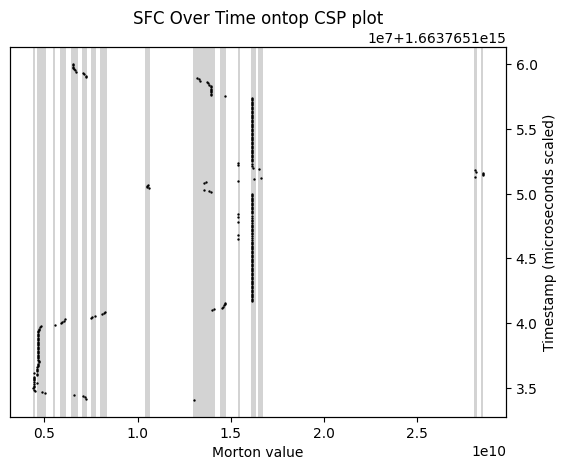

In [18]:
fig, ax = plt.subplots()

ax.hist(df['morton'], bins=200, color='lightgray')
ax.set_ylim([0,1])
plt.gca().set_yticks([]) 
#ax.set_xlim([0, 40000000000])

ax2 = ax.twinx()

ax2.scatter(x=df['morton'],y=df['ts'], c='black', s=0.5)

ax.set_xlabel('Morton value')

ax2.set_title("SFC Over Time ontop CSP plot")
ax2.set_ylabel('Timestamp (microseconds scaled)')

plt.show()

##### 

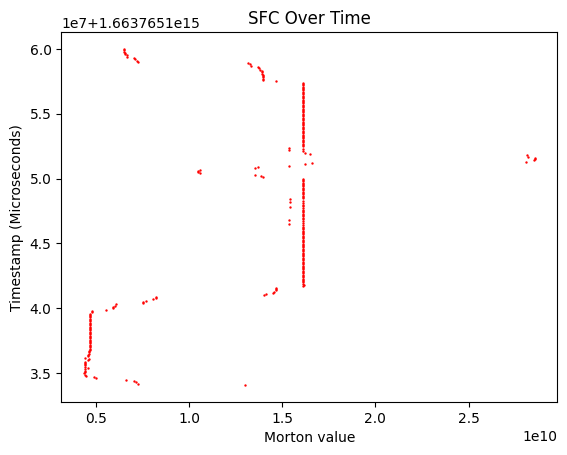

In [9]:
plt.scatter(x=df['morton'],y=df['ts'], c='red', s=0.5)
plt.title("SFC Over Time")
plt.xlabel("Morton value")
plt.ylabel("Timestamp (Microseconds)")
plt.show()
#output_df.plot(x = 'ts', y = ['accel_lon', 'accel_trans'], title="Accelerations against Timestamp", xlabel="Timestamp (Microseconds)", ylabel="Acceleration (m/s\u00B2)")

#plt.savefig('MortonScatterTest9.png', transparent=True)

In [49]:
# 2D-plot with timestamp as color gradient
#df.plot(kind='scatter',x='SteeringWhlAngle',y='IMULatAcceleration',color=df['ts'])
#df.plot(kind='scatter',x='accel_lon',y='accel_trans',color=df['ts'])

In [50]:
#creating 3D-Plot
#ax = plt.axes(projection ="3d")
#ax.scatter3D(df['SteeringWhlAngle'],df['IMULatAcceleration'], color = "green")

### multidimensional plot

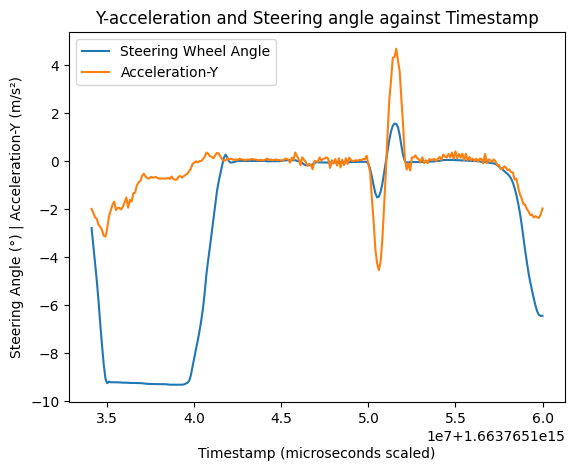

In [22]:
# Plot result
#df.plot(x = 'IMULatAcceleration', y = 'SteeringWhlAngle')
df.plot(x='ts', y=['SteeringWhlAngle', 'IMULatAcceleration'], title='Y-acceleration and Steering angle against Timestamp', xlabel='\nTimestamp (microseconds scaled)', ylabel='Steering Angle (°) | Acceleration-Y (m/s\u00B2)')
plt.legend(['Steering Wheel Angle', 'Acceleration-Y'])

# Remove noise

In [52]:
# read steering/accel data
df_Accel = pd.read_csv('data/2022-09-21_LaneChanges/Accel_Separated/10Hz/with_noise/Vehicle-IMU-Acceleration-31.csv', sep=';')
df_Accel['ts'] = (df_Accel['sampleTimeStamp.seconds']*1000000)+df_Accel['sampleTimeStamp.microseconds']
df_Accel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

df_Steering = pd.read_csv('data/2022-09-21_LaneChanges/SteeringWheelAngle_Separated/10Hz/with_noise/SteeringWheelAngle-31.csv', sep=';')
df_Steering.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

df = pd.concat([df_Accel, df_Steering], axis=1)

# Read GPS data
df_Gps = pd.read_csv('data/2022-09-21_LaneChanges/GPS-20Hz.csv', sep=';')
df_Gps['ts'] = (df_Gps['sampleTimeStamp.seconds']*1000000)+df_Gps['sampleTimeStamp.microseconds']
df_Gps.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

# Get the time range in which the lane change takes place.
timeMin = df['ts'].min()
timeMax = df['ts'].max()


# Extract specific lane change timeframe
df_Gps = df_Gps[(df_Gps['ts'] >= timeMin) & (df_Gps['ts'] <= timeMax)]

In [53]:
# Plot sensor data against ts, and plot gps data

start = 145
end = 190

# sensor against ts
output_df_sens = df
output_df_sens = df.iloc[start:end]

# Get the time range in which the lane change takes place.
timeMin = output_df_sens['ts'].min()
timeMax = output_df_sens['ts'].max()



output_df_sens.plot(x='ts', y=['SteeringWhlAngle', 'IMULatAcceleration'], title='Lateral acceleration and Steering angle against Timestamp', xlabel='Timestamp (Microseconds)', ylabel='Steering Angle (°) | Lateral Acceleration (m/s\u00B2)')

# gps
output_df_gps = df_Gps
output_df_gps = df_Gps[(df_Gps['ts'] >= timeMin) & (df_Gps['ts'] <= timeMax)]
output_df_gps.plot(x = 'longitude', y = 'latitude', title="GPS plot", xlabel="Longitude", ylabel="Latitude", legend=False)


In [54]:
# Save the lc
#output_df_sens.to_csv("data/2022-09-21_LaneChanges/Extracted_CleanLaneChanges/lane_change_32.csv", sep=";", index=False)

# Output all noise files

In [55]:
# Loop through noise files, and output CSP, SFC-over-time and Sensor/time plots
accelerationNoiseFolder = "data/2022-09-21_LaneChanges/Accel_Separated/10Hz/with_noise"
steeringWhlAngleNoiseFolder = "data/2022-09-21_LaneChanges/SteeringWheelAngle_Separated/10Hz/with_noise/"
#print(len(os.listdir(accelerationNoiseFolder)))
#print(len(os.listdir(steeringWhlAngleNoiseFolder)))

amountOfNoiseFiles = 15 # defines the number of total noise files for each sensor

# For both folders at the same time combine into 1 df.
for accelNoiseFile, steeringWhlNoiseFile in zip(sorted(os.listdir(accelerationNoiseFolder)), sorted(os.listdir(steeringWhlAngleNoiseFolder))):
    if int(accelNoiseFile[-6:-4]) > 15 or int(steeringWhlNoiseFile[-6:-4]) > 15:
        break
    print(accelNoiseFile, " | ", steeringWhlNoiseFile)
    accelFullPath = f'{accelerationNoiseFolder}/{accelNoiseFile}'
    steeringFullPath = f'{steeringWhlAngleNoiseFolder}/{steeringWhlNoiseFile}'
    accelNoiseDf = pd.read_csv(accelFullPath, sep=';')
    steeringNoiseDf = pd.read_csv(steeringFullPath, sep=';')
    steeringNoiseDf = steeringNoiseDf.add_suffix('.1') # add suffix to prevent duplicate columns
    
    accelNoiseDf['ts'] = (accelNoiseDf['sampleTimeStamp.seconds']*1000000)+accelNoiseDf['sampleTimeStamp.microseconds']
    
    df = pd.concat([accelNoiseDf, steeringNoiseDf], axis=1)
    
    # Confirm time is aligned between the steering and acceleration sensors
    #print(df['sampleTimeStamp.seconds'].equals(df['sampleTimeStamp.seconds.1']))
    #print(df.isnull().values.any())
    
    df = df.rename(columns = lambda colName: colName.replace('.1', '') )
    
    #print(df)


    # add offset and factor multiply
    df['IMULgtAcceleration']=df['IMULgtAcceleration'].add(OFFSET)
    df['IMULatAcceleration']=df['IMULatAcceleration'].add(OFFSET)
    df['SteeringWhlAngle']=df['SteeringWhlAngle'].add(OFFSET)

    df['IMULgtAcceleration'] = df.apply(lambda x: int(x['IMULgtAcceleration']*FACTOR_MULTIPLY) , axis=1)
    df['IMULatAcceleration'] = df.apply(lambda x: int(x['IMULatAcceleration']*FACTOR_MULTIPLY) , axis=1)
    df['SteeringWhlAngle'] = df.apply(lambda x: int(x['SteeringWhlAngle']*FACTOR_MULTIPLY) , axis=1)
    
    # Morton encoding
    df['morton'] = df.apply(set_value, axis=1)


# output in one row
# outputting in same row based on: https://towardsdatascience.com/plot-multiple-graphics-in-the-same-figure-using-python-1cbe5a23e89f and https://www.statology.org/pandas-subplots/ and https://stackoverflow.com/questions/49006699/plot-two-pandas-data-frames-side-by-side-each-in-subplot-style
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

    # OUTPUT IN ONE ROW
    # output: sensor against ts
    df.plot(x='ts', y=['SteeringWhlAngle', 'IMULatAcceleration'], ax=ax[0])
    ax[0].set_xlabel('Timestamp (Microseconds)', fontsize=8)
    ax[0].set_ylabel('Steering Angle (°) | Lateral Acceleration (m/s\u00B2)', fontsize=8)
    ax[0].set_title('Lateral acceleration and Steering angle against Timestamp', fontsize=12)
    # output: CSP
    
    # 'bins' explained: https://www.metabase.com/glossary/bin
    ax[1].hist(df['morton'], bins=200)

    min = df['morton'].min()
    max = df['morton'].max()
    #max = 40000000000
    #min = 14000000000
    max = 30000000000

    # limit y axis to 1 to show binary presence of data point
    ax[1].set_ylim([0,1])
    ax[1].set_xlim([0,max])
    # limit x axis to take only "lane change relevant" data
    #plt.xlim(9000000000,13000000000)
    ax[1].set_xlabel('Morton value', fontsize=8)

    ax[1].set_title("Characteristic Stripe Pattern", fontsize=12)

    #plt.show()
    
    # output: SFC-over-time
    #fig, ax = plt.subplots()

    ax[2].hist(df['morton'], bins=200, color='lightgray')
    ax[2].set_ylim([0,1])
    ax[2].set_xlim([0,max])
    #ax.set_xlim([0, 40000000000])

    ax2 = ax[2].twinx()

    ax2.scatter(x=df['morton'],y=df['ts'], c='black', s=0.5)

    ax[2].set_xlabel('Morton value', fontsize=8)

    ax2.set_title("SFC Over Time ontop CSP plot", fontsize=12)
    ax2.set_ylabel('Timestamp (Microseconds)', fontsize=8)


    plt.show()
    
# OUTPUT IN ONE ROW
# output: CSP
# output: SFC-over-time
# output: sensor against ts

# Output all lane changes (dataset B)

In [56]:
# Loop through lane change files, and output CSP, SFC-over-time and Sensor/time plots
folderToView = "data/2022-09-21_LaneChanges/Extracted_CleanLaneChanges/"

# Code adapted from: https://stackoverflow.com/questions/70897491/using-python-pandas-to-loop-over-several-csv-files-in-a-folder-and-make-changes
for file in sorted(os.listdir(folderToView)):
    print(file)
    fullPath = f'{folderToView}/{file}'
    df = pd.read_csv(fullPath, sep=';')
    
    # Confirm time is aligned between the steering and acceleration sensors
    # print(df['sampleTimeStamp.seconds'].equals(df['sampleTimeStamp.seconds.1']))
    #print(df.isnull().values.any())
    
    # add offset and factor multiply
    df['IMULgtAcceleration']=df['IMULgtAcceleration'].add(OFFSET)
    df['IMULatAcceleration']=df['IMULatAcceleration'].add(OFFSET)
    df['SteeringWhlAngle']=df['SteeringWhlAngle'].add(OFFSET)

    df['IMULgtAcceleration'] = df.apply(lambda x: int(x['IMULgtAcceleration']*FACTOR_MULTIPLY) , axis=1)
    df['IMULatAcceleration'] = df.apply(lambda x: int(x['IMULatAcceleration']*FACTOR_MULTIPLY) , axis=1)
    df['SteeringWhlAngle'] = df.apply(lambda x: int(x['SteeringWhlAngle']*FACTOR_MULTIPLY) , axis=1)

    # Morton encoding
    df['morton'] = df.apply(set_value, axis=1)
    
    # outputting in same row based on: https://towardsdatascience.com/plot-multiple-graphics-in-the-same-figure-using-python-1cbe5a23e89f and https://www.statology.org/pandas-subplots/ and https://stackoverflow.com/questions/49006699/plot-two-pandas-data-frames-side-by-side-each-in-subplot-style
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

    # OUTPUT IN ONE ROW
    # output: sensor against ts
    df.plot(x='ts', y=['SteeringWhlAngle', 'IMULatAcceleration'], ax=ax[0])
    ax[0].set_xlabel('Timestamp (Microseconds)', fontsize=8)
    ax[0].set_ylabel('Steering Angle (°) | Lateral Acceleration (m/s\u00B2)', fontsize=8)
    ax[0].set_title('Lateral acceleration and Steering angle against Timestamp', fontsize=12)
    # output: CSP
    
    # 'bins' explained: https://www.metabase.com/glossary/bin
    ax[1].hist(df['morton'], bins=200)

    min = df['morton'].min()
    max = df['morton'].max()
    max = 30000000000
    #max = 20000000000

    # limit y axis to 1 to show binary presence of data point
    ax[1].set_ylim([0,1])
    ax[1].set_xlim([0,max])
    # limit x axis to take only "lane change relevant" data
    #plt.xlim(9000000000,13000000000)
    ax[1].set_xlabel('Morton value', fontsize=8)

    ax[1].set_title("Characteristic Stripe Pattern", fontsize=12)

    #plt.show()
    
    # output: SFC-over-time
    #fig, ax = plt.subplots()

    ax[2].hist(df['morton'], bins=200, color='lightgray')
    ax[2].set_ylim([0,1])
    ax[2].set_xlim([0, max])

    ax2 = ax[2].twinx()

    ax2.scatter(x=df['morton'],y=df['ts'], c='black', s=0.5)

    ax[2].set_xlabel('Morton value', fontsize=8)

    ax2.set_title("SFC Over Time ontop CSP plot", fontsize=12)
    ax2.set_ylabel('Timestamp (Microseconds)', fontsize=8)


    plt.show()
    

lane_change_16.csv


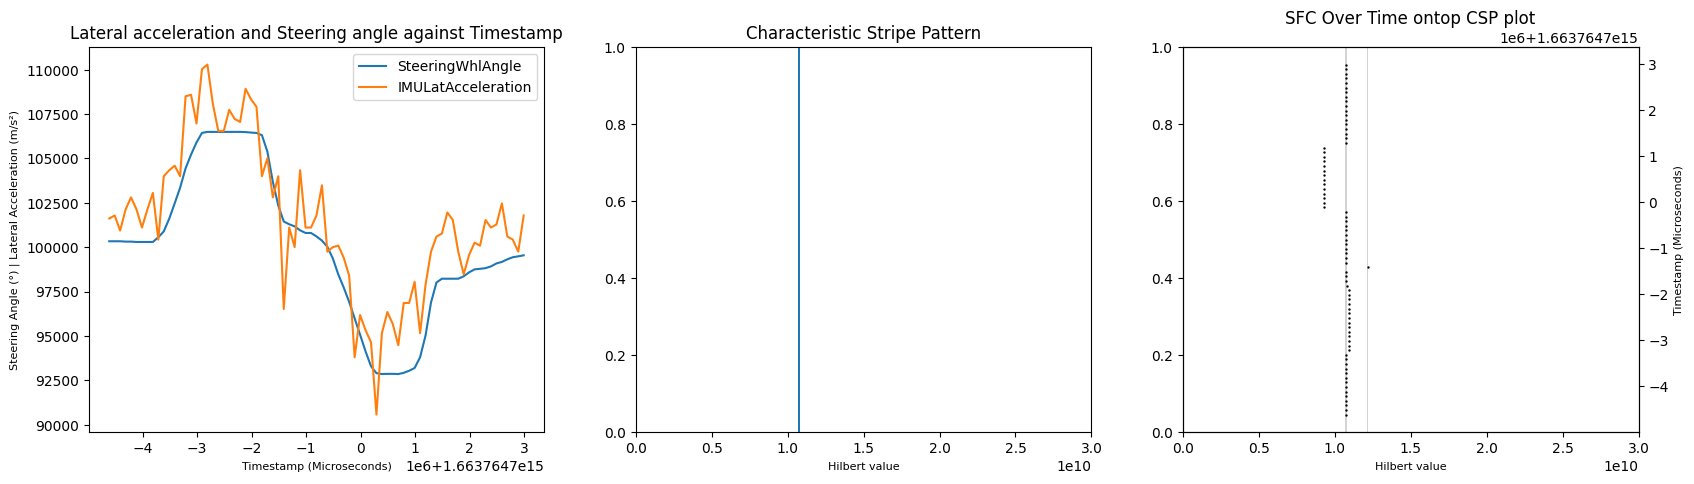

lane_change_17.csv


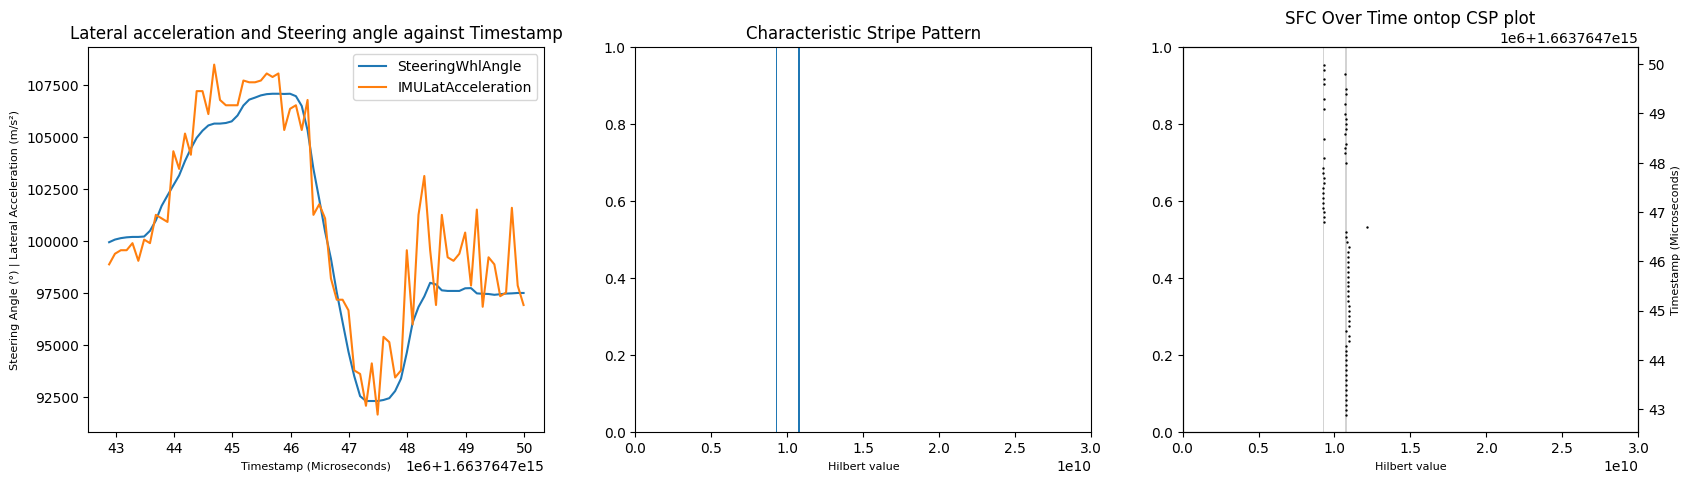

lane_change_18.csv


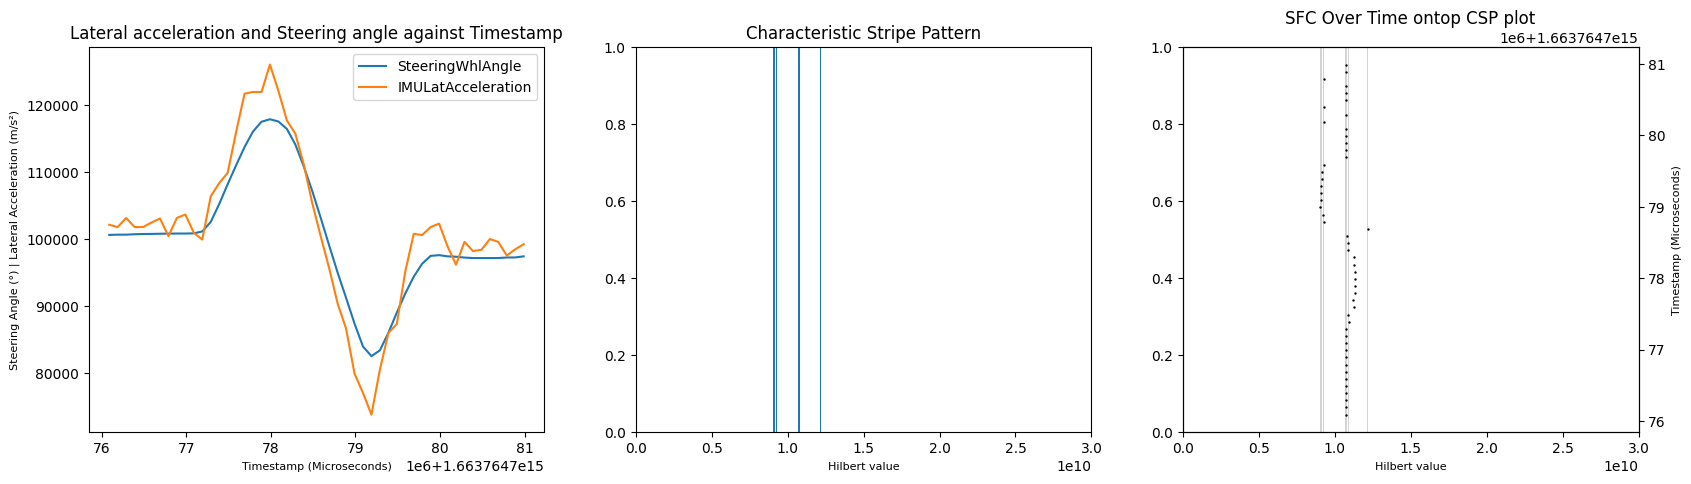

lane_change_19.csv


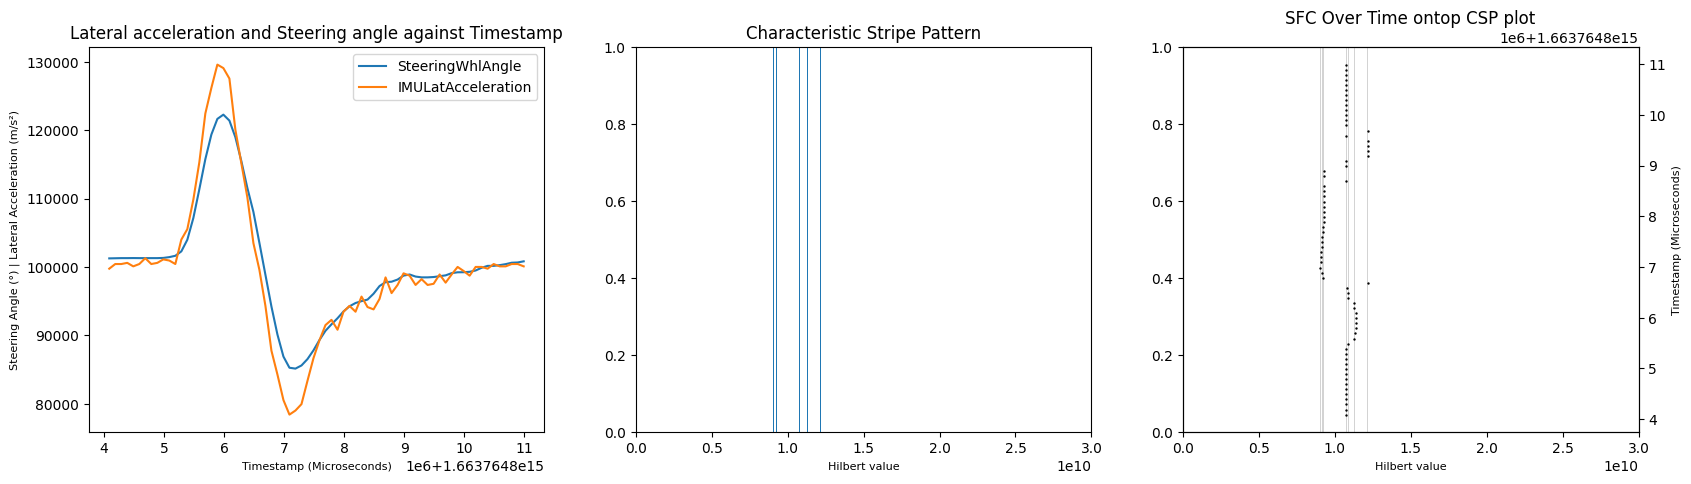

lane_change_20.csv


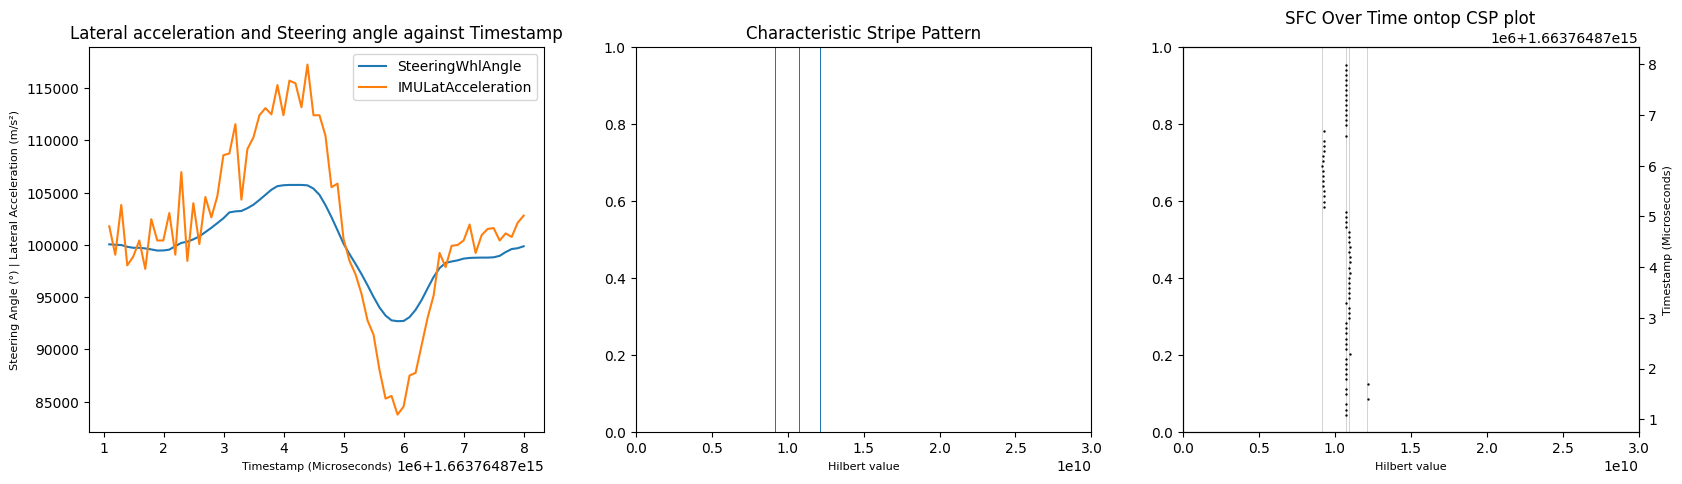

lane_change_21.csv


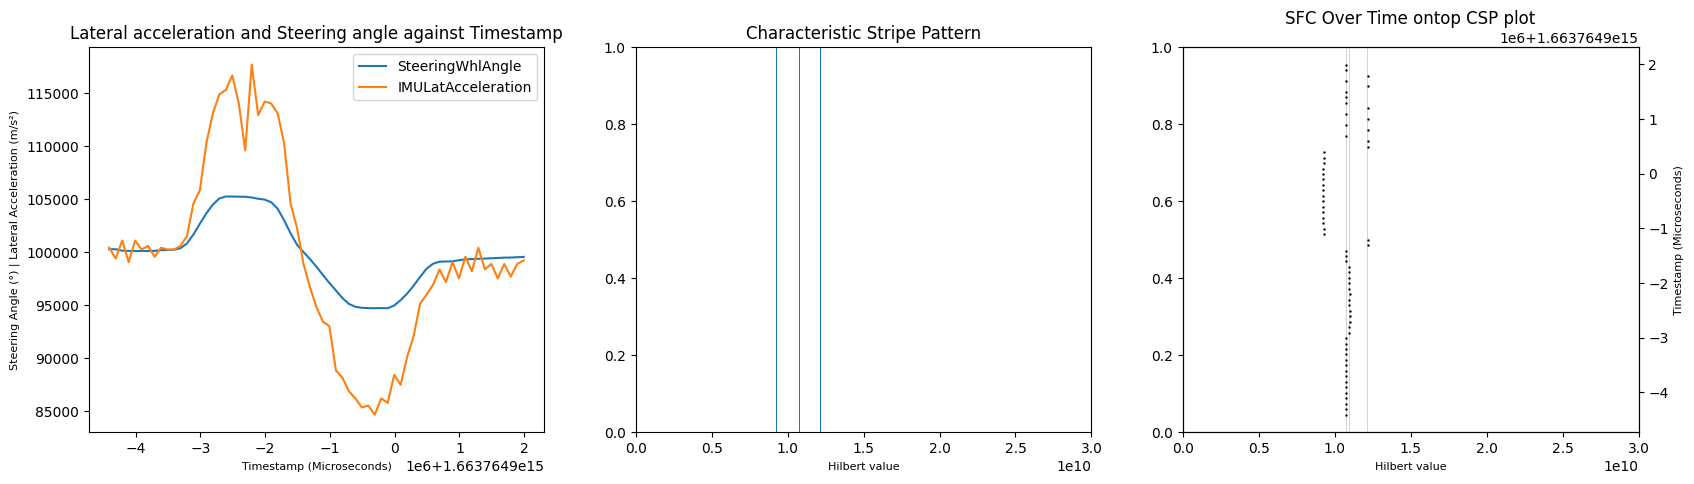

lane_change_22.csv


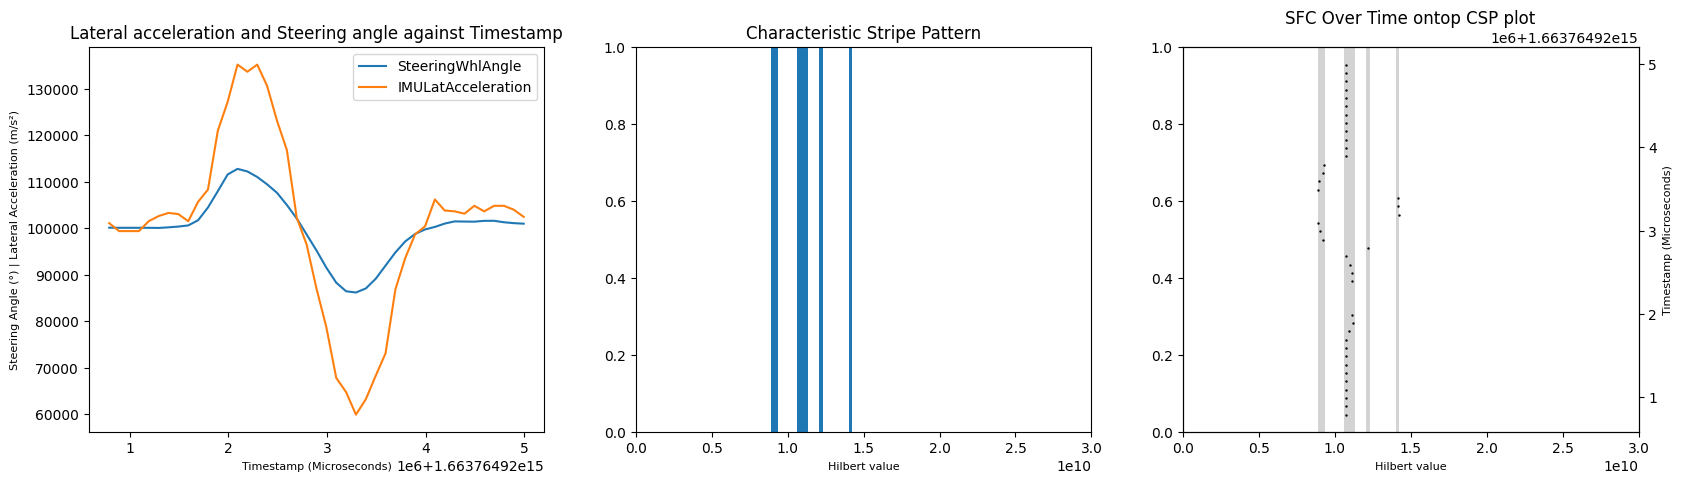

lane_change_23.csv


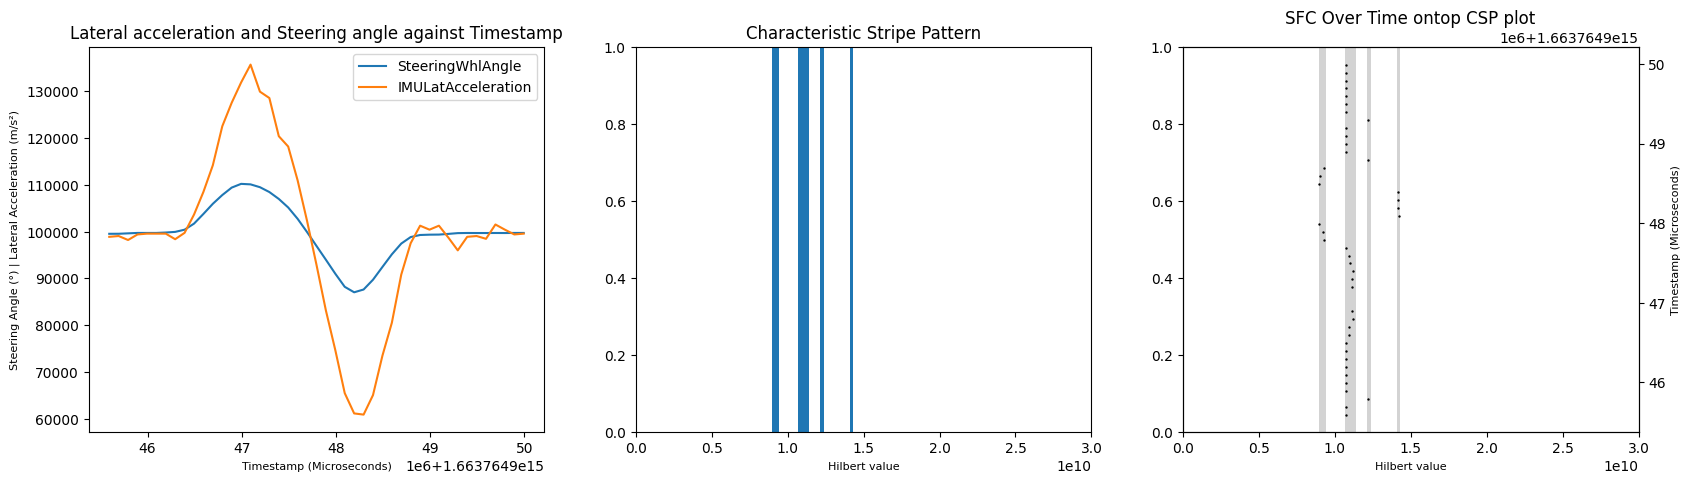

lane_change_24.csv


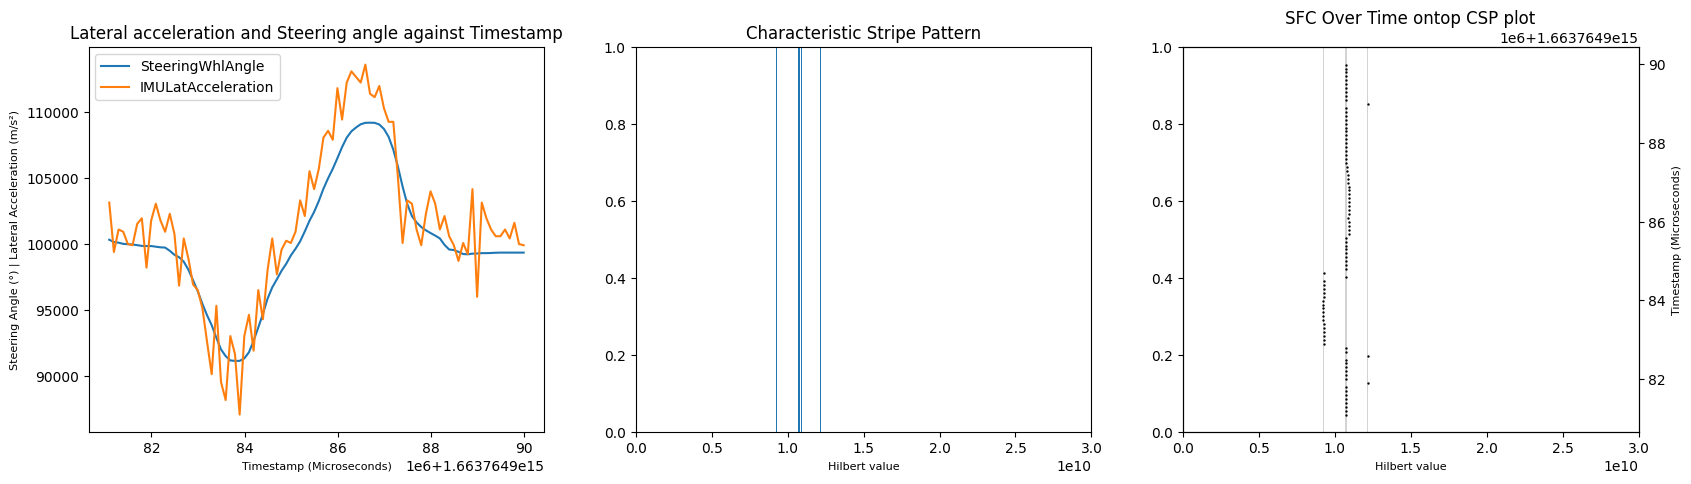

lane_change_25.csv


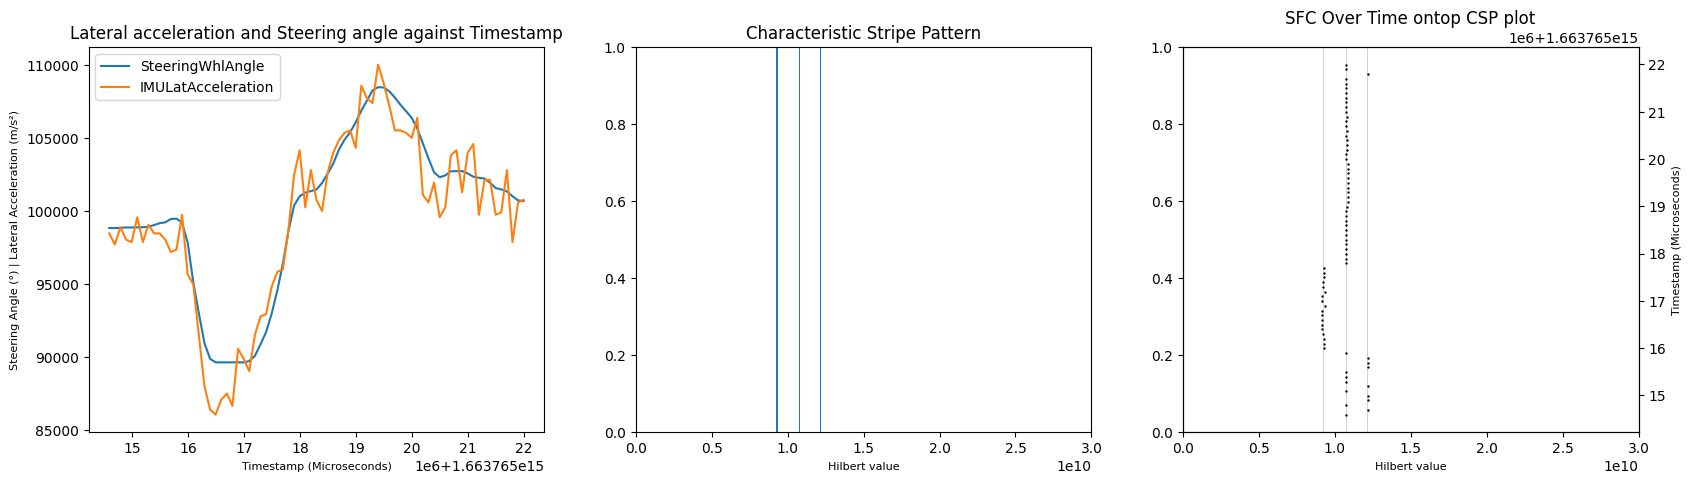

lane_change_26.csv


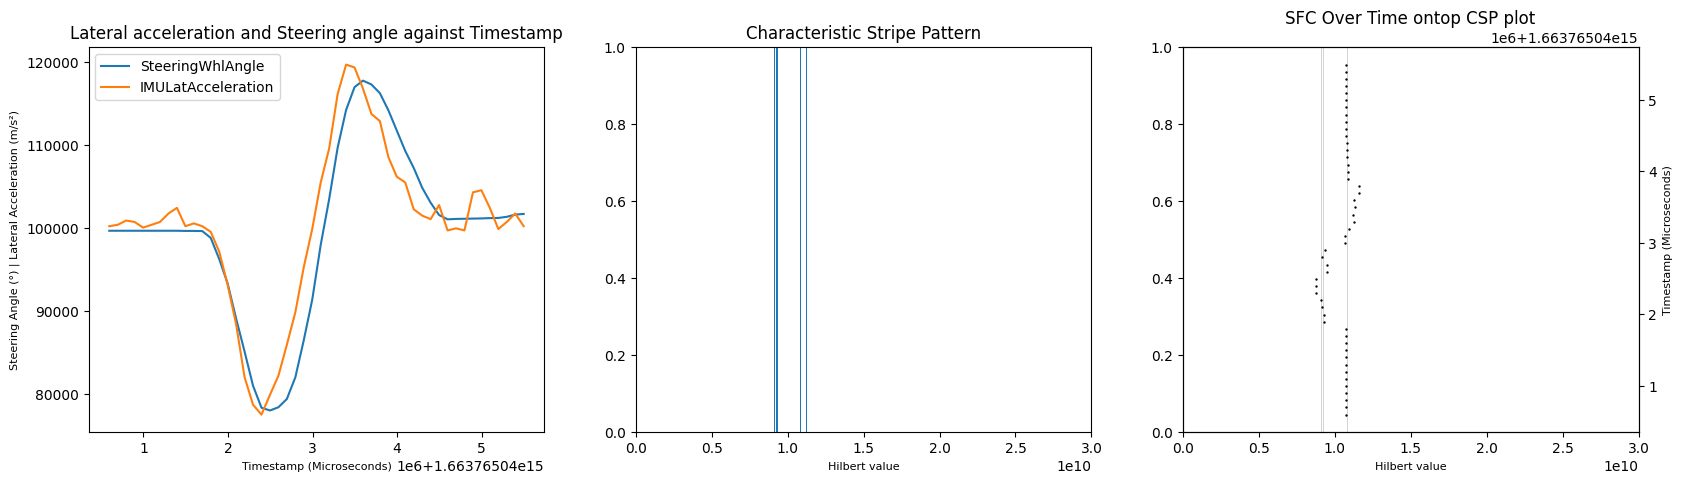

lane_change_27.csv


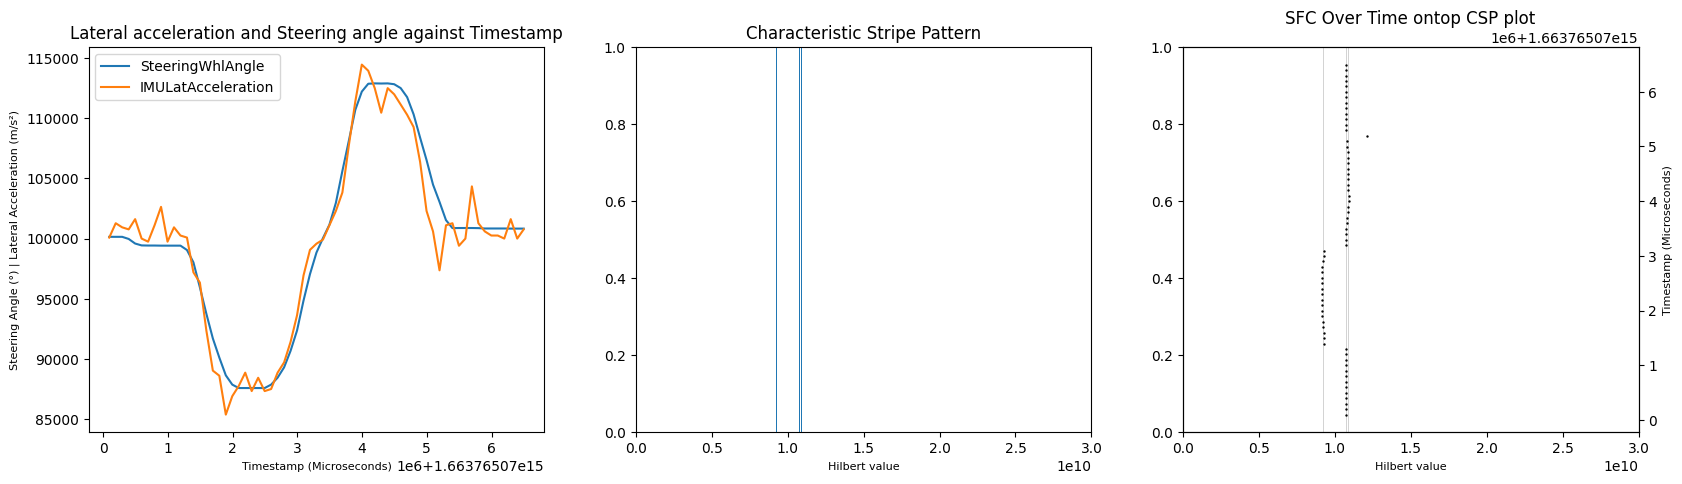

lane_change_28.csv


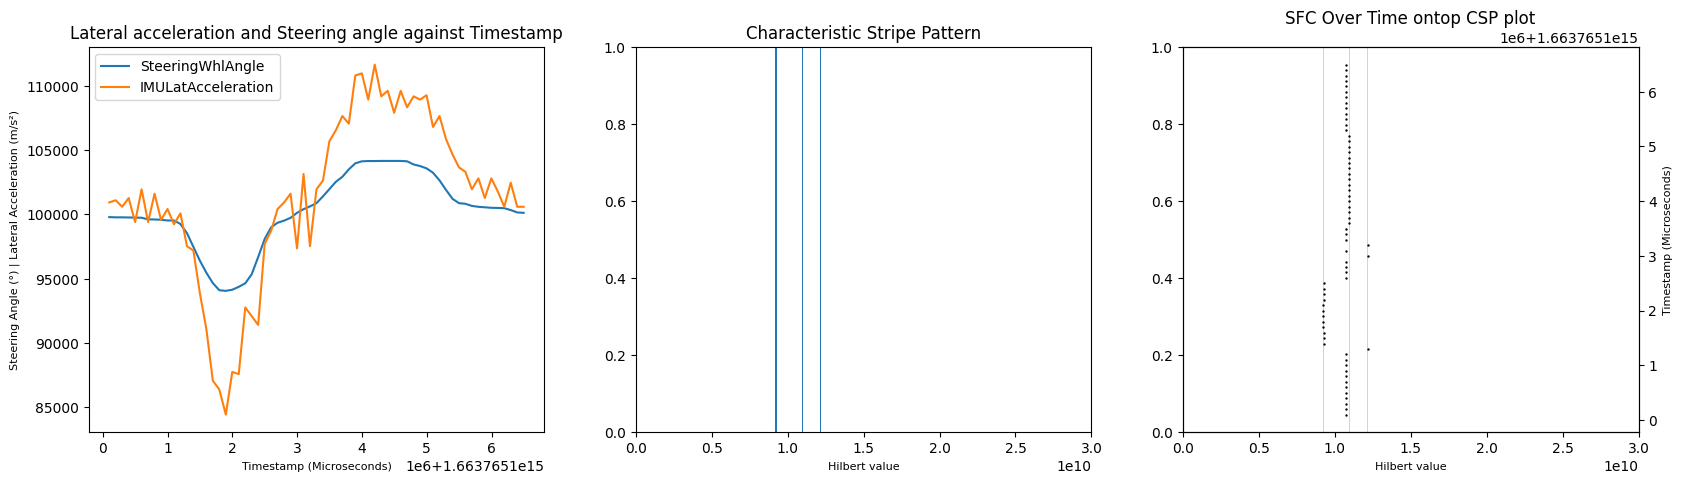

lane_change_29.csv


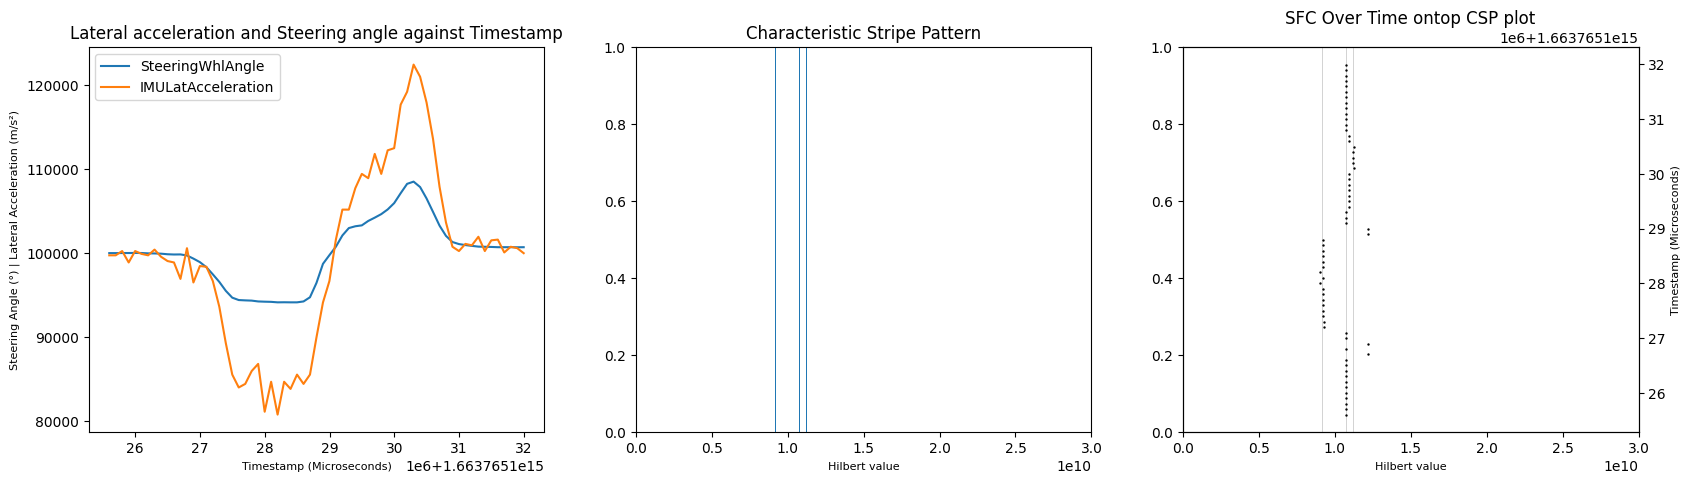

lane_change_30.csv


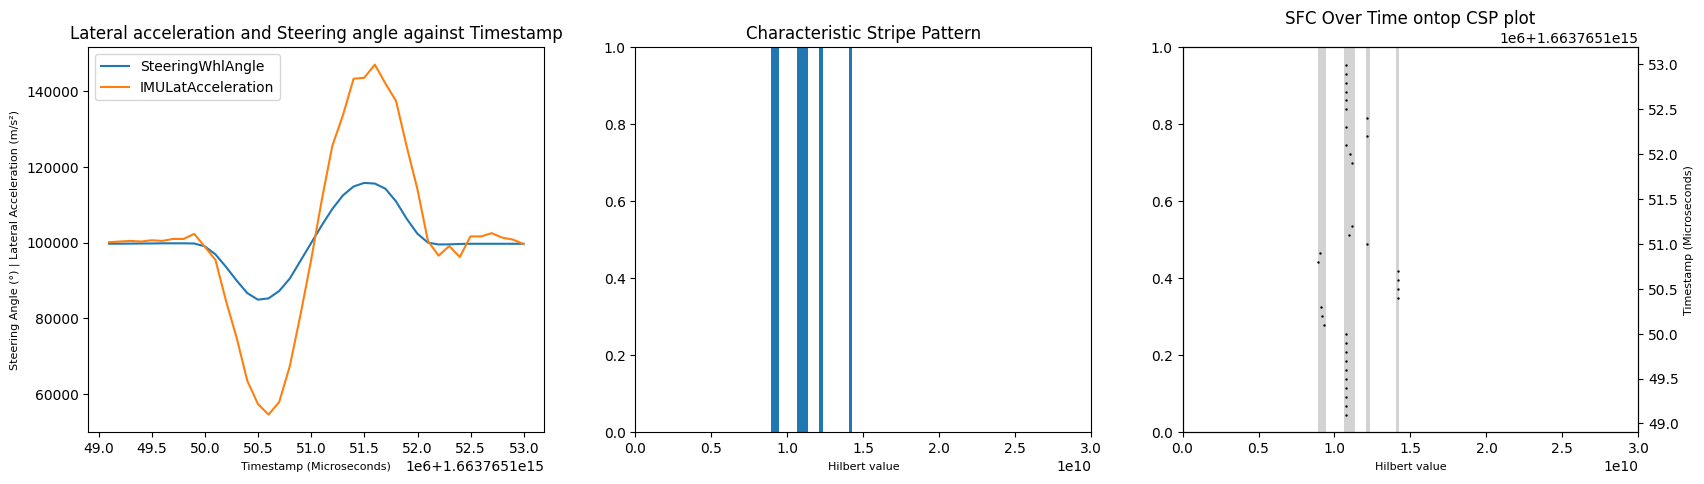

lane_change_31.csv


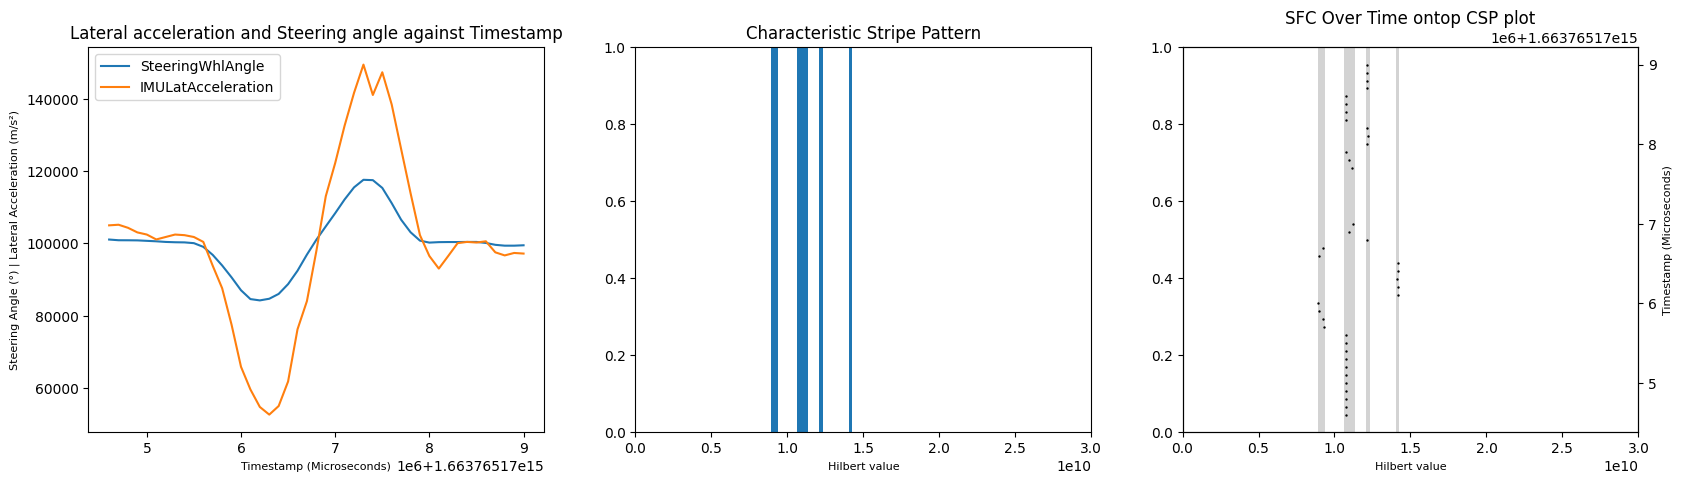

In [4]:
# Loop through lane change files, and output CSP, SFC-over-time and Sensor/time plots
folderToView = "data/2022-09-21_LaneChanges/Extracted_CleanLaneChanges/All_LCs_regardless_of_direction"

# Code adapted from: https://stackoverflow.com/questions/70897491/using-python-pandas-to-loop-over-several-csv-files-in-a-folder-and-make-changes
for file in sorted(os.listdir(folderToView)):
    print(file)
    fullPath = f'{folderToView}/{file}'
    df = pd.read_csv(fullPath, sep=';')
    
    # Confirm time is aligned between the steering and acceleration sensors
    # print(df['sampleTimeStamp.seconds'].equals(df['sampleTimeStamp.seconds.1']))
    #print(df.isnull().values.any())
    
    # add offset and factor multiply
    df['IMULgtAcceleration']=df['IMULgtAcceleration'].add(OFFSET)
    df['IMULatAcceleration']=df['IMULatAcceleration'].add(OFFSET)
    df['SteeringWhlAngle']=df['SteeringWhlAngle'].add(OFFSET)

    df['IMULgtAcceleration'] = df.apply(lambda x: int(x['IMULgtAcceleration']*FACTOR_MULTIPLY) , axis=1)
    df['IMULatAcceleration'] = df.apply(lambda x: int(x['IMULatAcceleration']*FACTOR_MULTIPLY) , axis=1)
    df['SteeringWhlAngle'] = df.apply(lambda x: int(x['SteeringWhlAngle']*FACTOR_MULTIPLY) , axis=1)

    # Hilbert encoding
    resolution = 18; dimension = 2
    hilbert_curve = HilbertCurve(resolution, dimension, n_procs=-1)

    points = df[['IMULatAcceleration', 'SteeringWhlAngle']].to_numpy()

    # Generate Hilbert index
    distances = hilbert_curve.distances_from_points(points)

    # Add Hilbert index to 'hilbert' column
    df_hilbert = pd.concat([df, pd.DataFrame(distances, columns = ['hilbert'] )], axis=1)
    df = df_hilbert.copy()
    
    # outputting in same row based on: https://towardsdatascience.com/plot-multiple-graphics-in-the-same-figure-using-python-1cbe5a23e89f and https://www.statology.org/pandas-subplots/ and https://stackoverflow.com/questions/49006699/plot-two-pandas-data-frames-side-by-side-each-in-subplot-style
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

    # OUTPUT IN ONE ROW
    # output: sensor against ts
    df.plot(x='ts', y=['SteeringWhlAngle', 'IMULatAcceleration'], ax=ax[0])
    ax[0].set_xlabel('Timestamp (Microseconds)', fontsize=8)
    ax[0].set_ylabel('Steering Angle (°) | Lateral Acceleration (m/s\u00B2)', fontsize=8)
    ax[0].set_title('Lateral acceleration and Steering angle against Timestamp', fontsize=12)
    # output: CSP
    
    # 'bins' explained: https://www.metabase.com/glossary/bin
    ax[1].hist(df['hilbert'], bins=200)

    min = df['hilbert'].min()
    max = df['hilbert'].max()
    max = 30000000000
    #max = 20000000000

    # limit y axis to 1 to show binary presence of data point
    ax[1].set_ylim([0,1])
    ax[1].set_xlim([0,max])
    # limit x axis to take only "lane change relevant" data
    #plt.xlim(9000000000,13000000000)
    ax[1].set_xlabel('Hilbert value', fontsize=8)

    ax[1].set_title("Characteristic Stripe Pattern", fontsize=12)

    #plt.show()
    
    # output: SFC-over-time
    #fig, ax = plt.subplots()

    ax[2].hist(df['hilbert'], bins=200, color='lightgray')
    ax[2].set_ylim([0,1])
    ax[2].set_xlim([0, max])

    ax2 = ax[2].twinx()

    ax2.scatter(x=df['hilbert'],y=df['ts'], c='black', s=0.5)

    ax[2].set_xlabel('Hilbert value', fontsize=8)

    ax2.set_title("SFC Over Time ontop CSP plot", fontsize=12)
    ax2.set_ylabel('Timestamp (Microseconds)', fontsize=8)


    plt.show()
    